<a href="https://colab.research.google.com/github/justingivens9583/CS4410-JG/blob/master/CS4410_Homework7_16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS4410 - Homework 7

##Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from datetime import datetime

##Making Keras, CUDA, and Python deterministic

In [2]:
keras.utils.set_random_seed(1337)
tf.config.experimental.enable_op_determinism
%env PYTHONHASHSEED=0
tf.config.experimental.enable_op_determinism()

env: PYTHONHASHSEED=0


##Loading the Fashion MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Data Exploration

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

##Visualizing Data

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

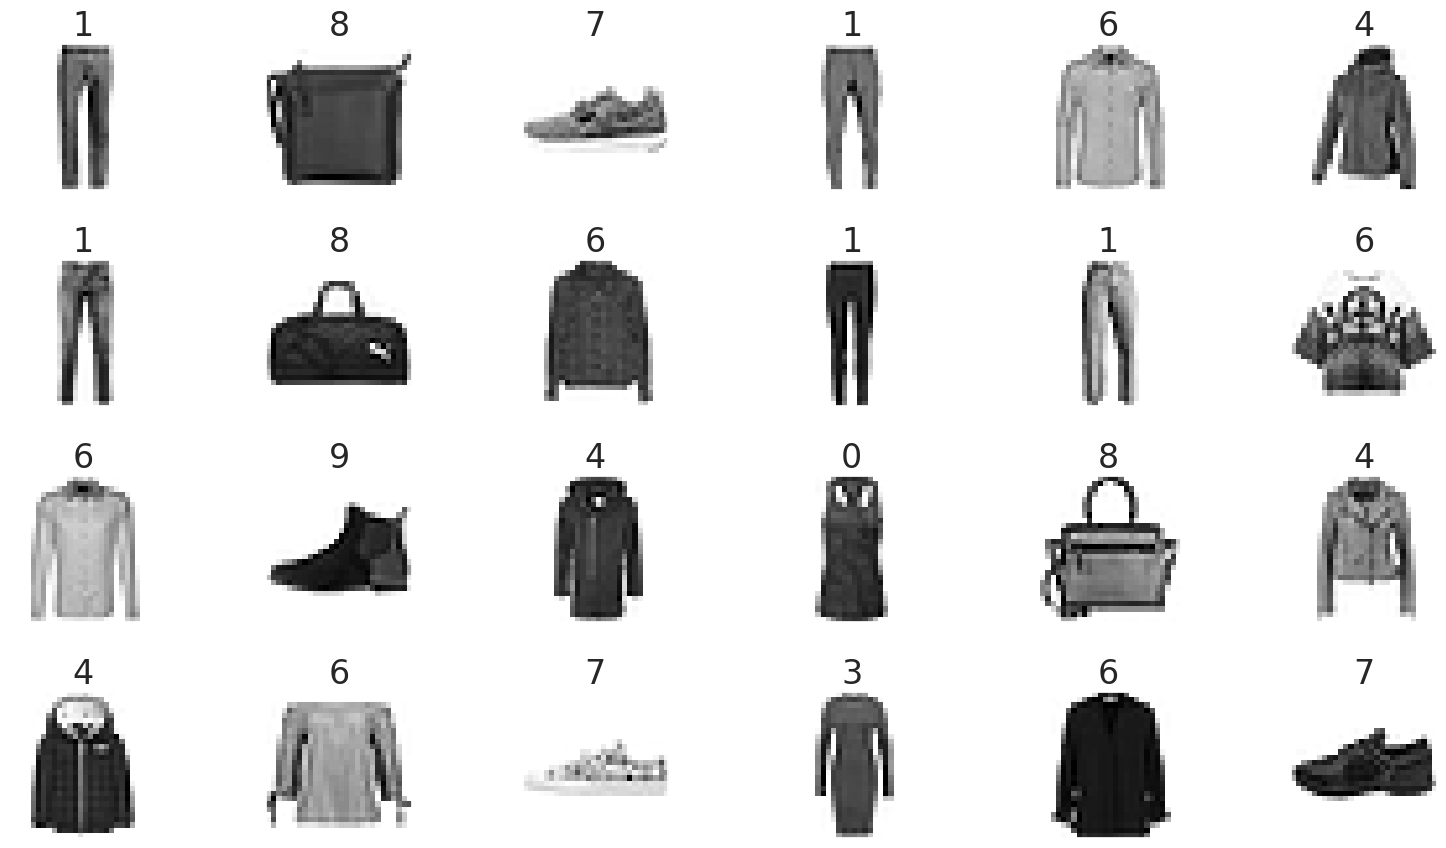

In [9]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()

##Data Preparation

In [10]:
#Reshaping set images
X_train = X_train.reshape((60000, 28, 28, 1))

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [13]:
X_test.shape

(10000, 28, 28, 1)

##Normalizing the Image Data

In [14]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

##One-Hot Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [18]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

##Creating the Nueral Network

In [19]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

##Adding Layers to the Network

In [20]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [21]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Adding Pooling Layer

In [22]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

##Flattening the results

In [24]:
cnn.add(Flatten())

##Adding a Dense Layer

In [25]:
cnn.add(Dense(units=128, activation='relu'))

##Adding additional dense layer for final output

In [26]:
cnn.add(Dense(units=10, activation='softmax'))

##Model's Summary

In [27]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

##Visualizing Model's Structure

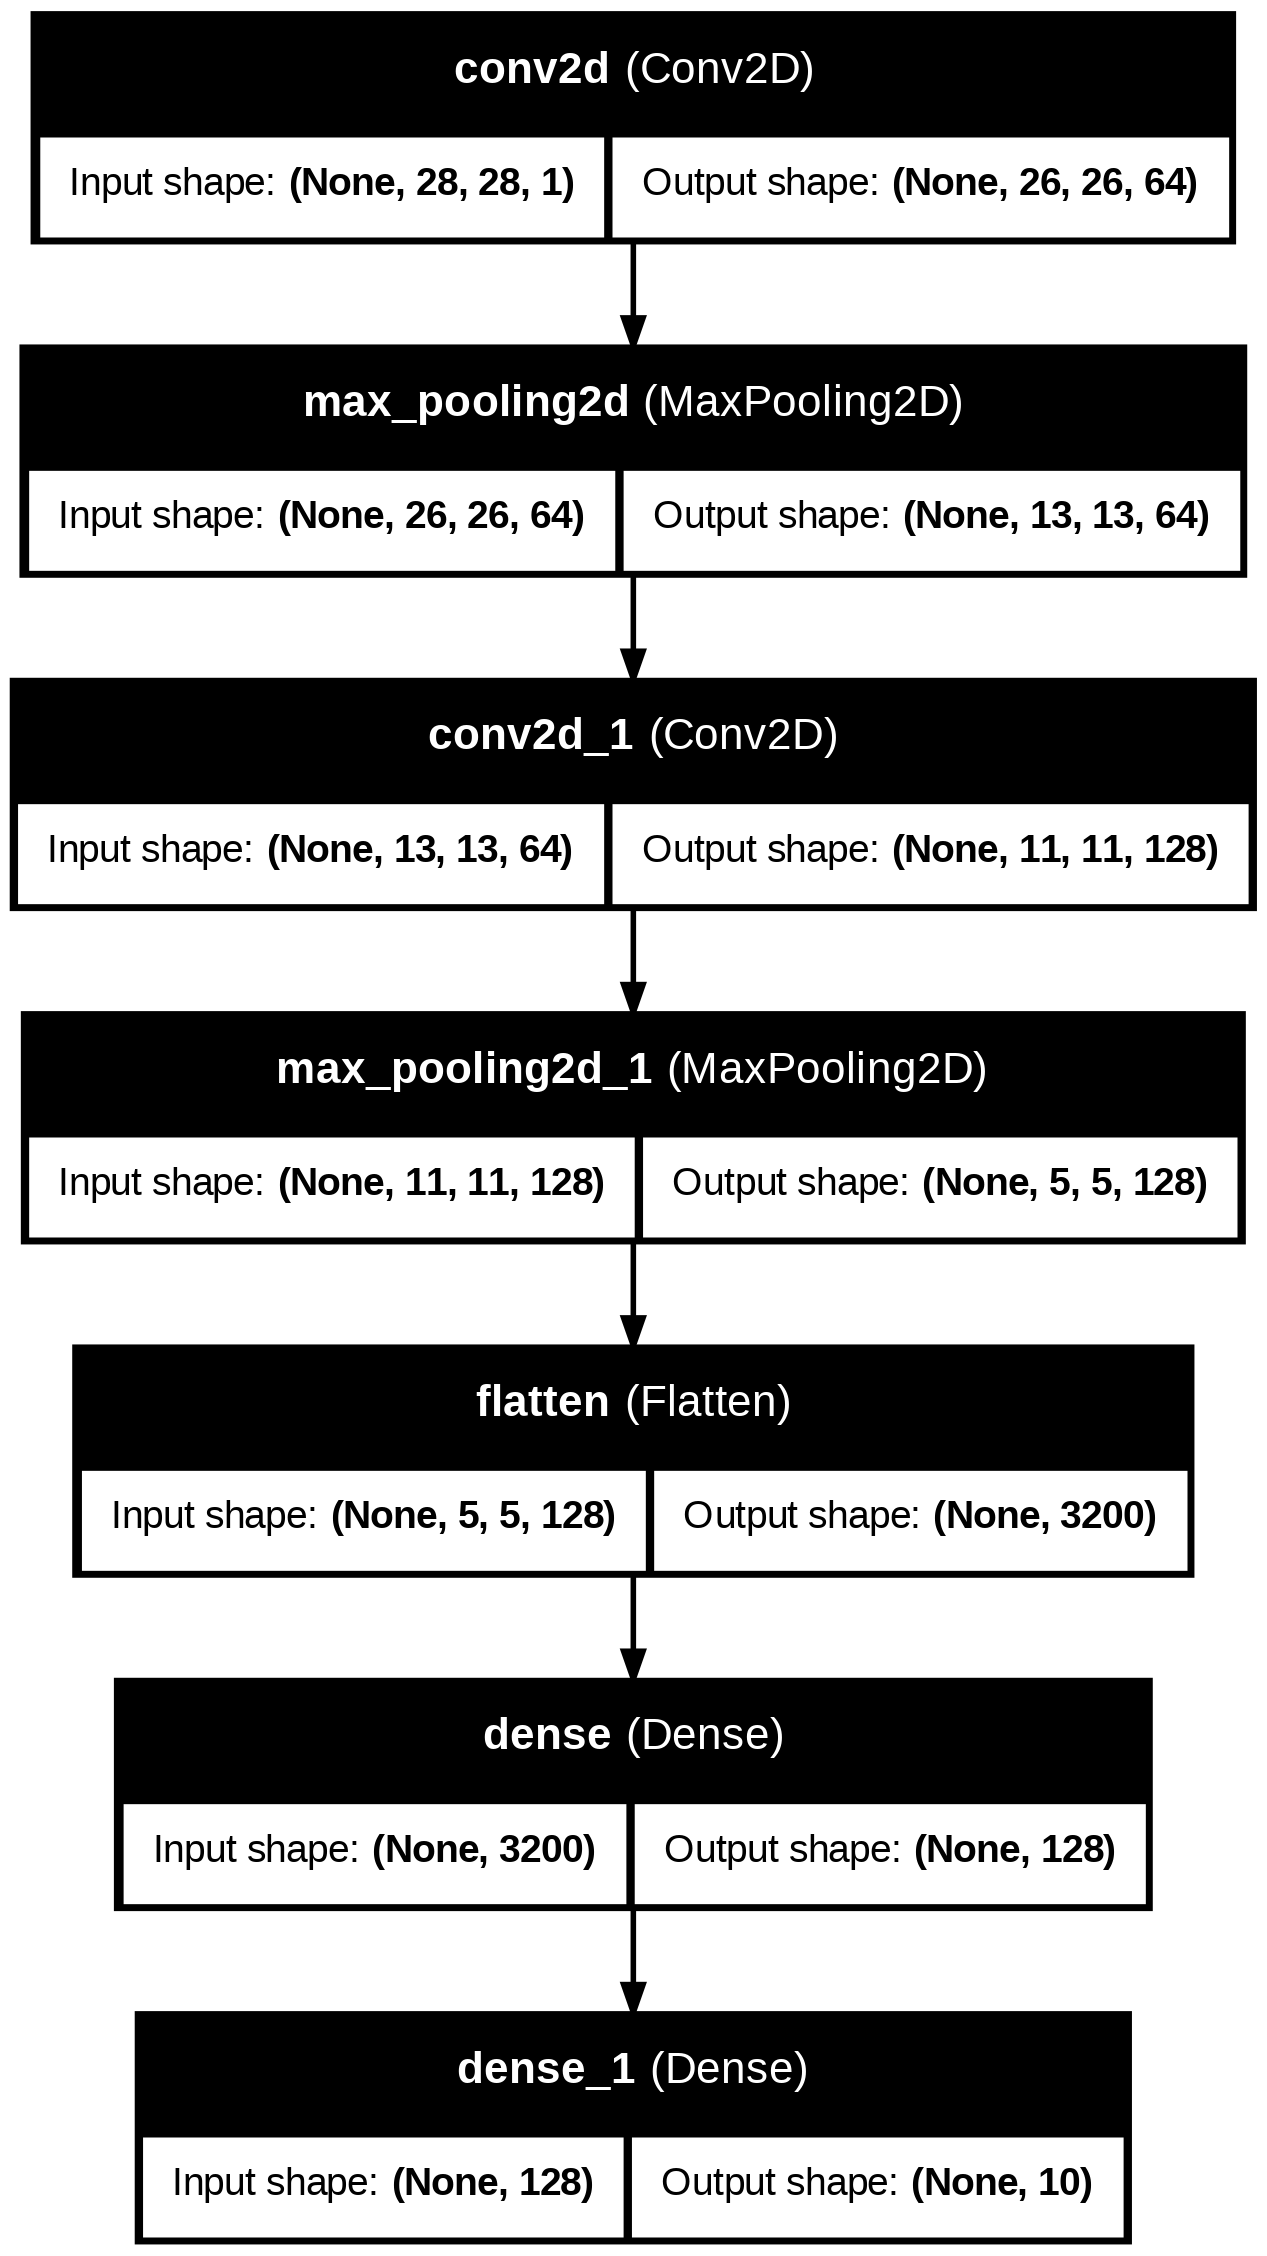

In [28]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

##Compiling the Model

In [29]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Training and Evaluating the Model (MNIST)

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 147s 171ms/step - accuracy: 0.9009 - loss: 0.3399 - val_accuracy: 0.9877 - val_loss: 0.0449
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9903 - val_loss: 0.0357
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 148s 175ms/step - accuracy: 0.9945 - loss: 0.0196 - val_accuracy: 0.9895 - val_loss: 0.0390
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 199s 172ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accuracy: 0.9882 - val_loss: 0.0449


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9853 - loss: 0.0568


In [ ]:
loss

0.04394495114684105

In [ ]:
accuracy

0.9890000224113464

##Training and Evaluating the Model (Fashion-MNIST)

In [30]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.7692 - loss: 0.6397 - val_accuracy: 0.8782 - val_loss: 0.3261
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 117s 139ms/step - accuracy: 0.8866 - loss: 0.3099 - val_accuracy: 0.8958 - val_loss: 0.2785
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 136ms/step - accuracy: 0.9041 - loss: 0.2591 - val_accuracy: 0.9032 - val_loss: 0.2603
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 113s 134ms/step - accuracy: 0.9190 - loss: 0.2199 - val_accuracy: 0.9085 - val_loss: 0.2511
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 114s 135ms/step - accuracy: 0.9314 - loss: 0.1881 - val_accuracy: 0.9080 - val_loss: 0.2481


In [31]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8956 - loss: 0.2897


In [32]:
loss

0.27362528443336487

In [33]:
accuracy

0.8981000185012817

##How well does the model perform on Fashion-MNIST compared to MNIST?
The model does not perform as well compared to the MNIST. Both the loss and accuracy are worse.
##How do the training times compare?
The training times on the Fashion-MNIST are lower than the MNIST.

##Making Prediction

In [34]:
predictions = cnn.predict(X_test)

y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [35]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000025331%
1: 0.0000040281%
2: 0.0000804441%
3: 0.0000004365%
4: 0.0000027578%
5: 0.0501162023%
6: 0.0000036386%
7: 0.0081065307%
8: 0.0000027749%
9: 99.9416708946%


##Locating the Incorrect Predictions

In [36]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append(
         (i, images[i], predicted, expected))

len(incorrect_predictions)

1019

##Visualizing Incorrect Predictions

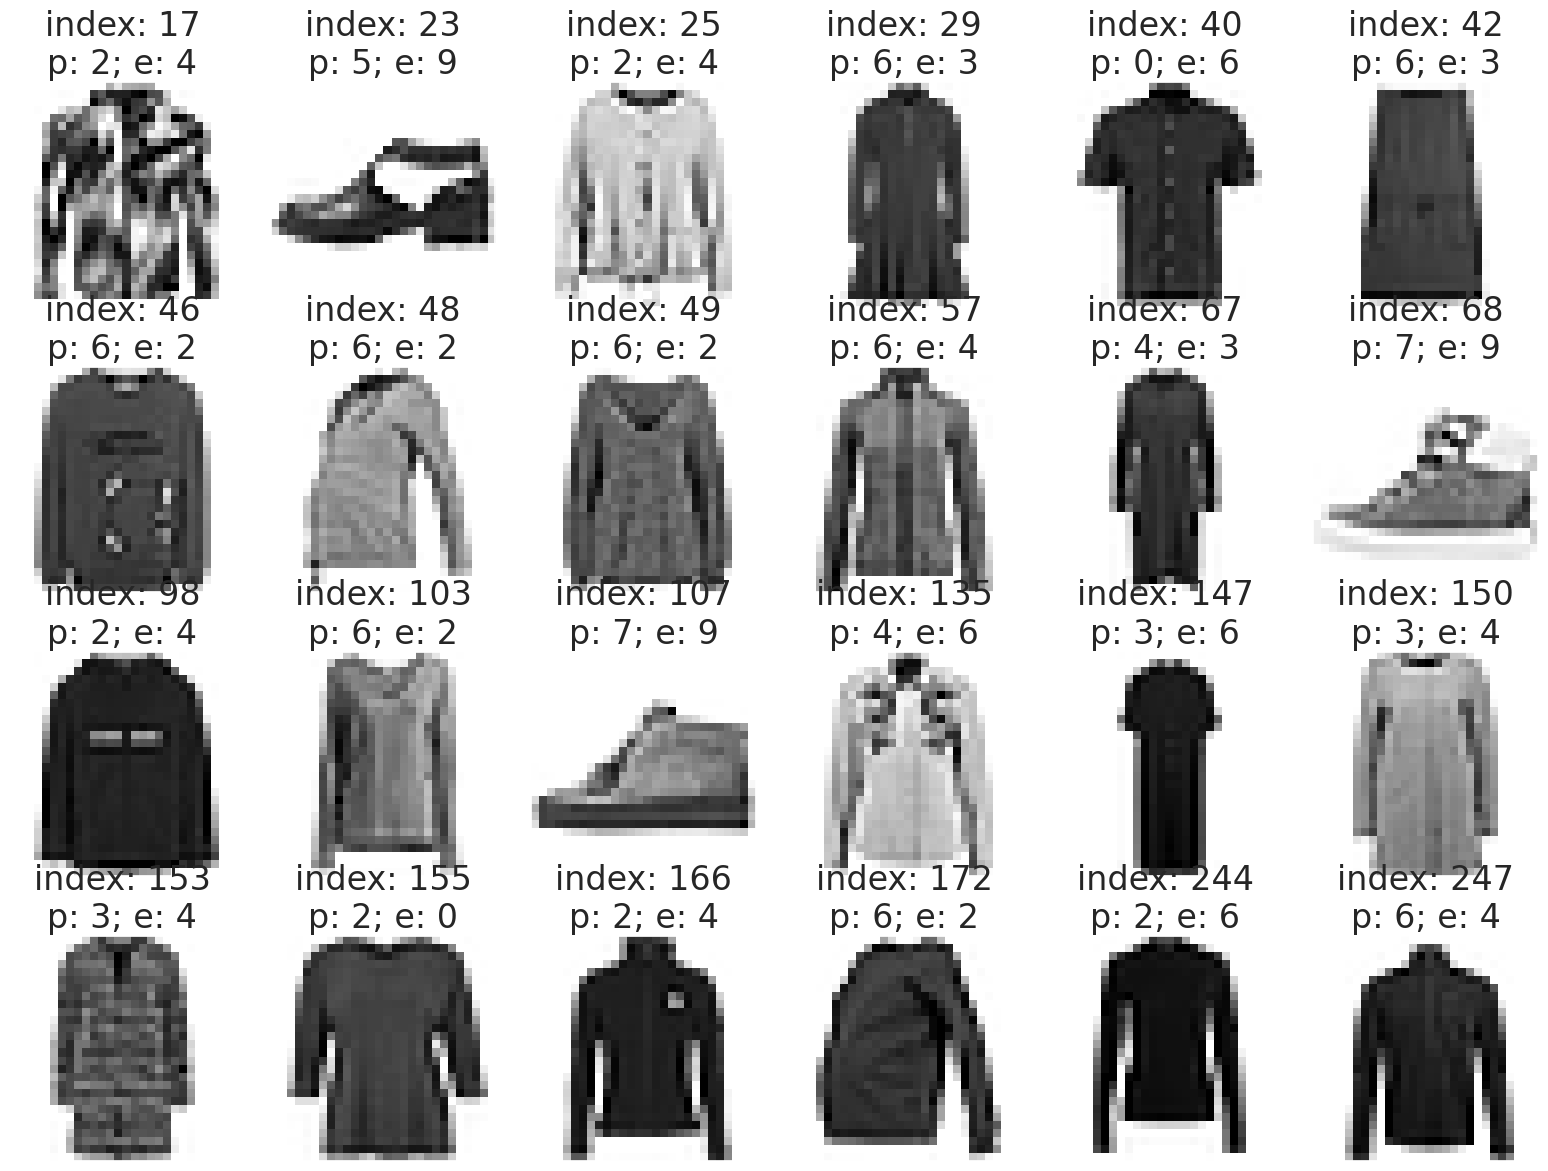

In [37]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
 index, image, predicted, expected = item
 axes.imshow(image, cmap=plt.cm.gray_r)
 axes.set_xticks([]) # remove x-axis tick marks
 axes.set_yticks([]) # remove y-axis tick marks
 axes.set_title(
  f'index: {index}\np: {predicted}; e: {expected}')
 plt.tight_layout()

##Displaying the Probabilities for Several Incorrect Predictions

In [41]:
def display_probabilities(prediction):
 for index, probability in enumerate(prediction):
  print(f'{index}: {probability:.10%}')

display_probabilities(predictions[23])

0: 0.0000106644%
1: 0.0000002616%
2: 0.0002277456%
3: 0.0000000139%
4: 0.0000000372%
5: 99.9296665192%
6: 0.0000010673%
7: 0.0032823235%
8: 0.0000520448%
9: 0.0667488028%


In [42]:
display_probabilities(predictions[135])

0: 0.0160605807%
1: 0.0000055958%
2: 0.8934747428%
3: 0.0204728945%
4: 66.9146597385%
5: 0.0000006133%
6: 32.1550935507%
7: 0.0000000255%
8: 0.0001887680%
9: 0.0000416807%


In [43]:
display_probabilities(predictions[150])

0: 1.2639179826%
1: 0.0050347775%
2: 30.0030797720%
3: 58.8947474957%
4: 0.7640033960%
5: 0.0000038316%
6: 9.0684875846%
7: 0.0000012077%
8: 0.0005308039%
9: 0.0001873569%


##Saving the Model

In [44]:
cnn.save('fashion-mnist_cnn.keras')